Script di bawah mengimpor berbagai library yang diperlukan untuk proses pengolahan citra, visualisasi data, serta analisis dan evaluasi model machine learning. Library yang digunakan antara lain yaitu:
1. Library os digunakan untuk manajemen file dan direktori, 
2. cv2 (OpenCV) berfungsi untuk membaca, menampilkan, dan menyimpan gambar. 
3. Library matplotlib.pyplot dan seaborn berguna untuk membuat berbagai jenis plot dan visualisasi data. 
4. numpy dan pandas digunakan untuk operasi numerik dan manipulasi data tabular. 
Untuk pembagian dataset dan validasi silang, script menggunakan sklearn.model_selection, sedangkan evaluasi performa model memanfaatkan berbagai fungsi dari sklearn.metrics seperti akurasi, precision, recall, f1-score, confusion matrix, dan classification report. Fitur tekstur citra dihitung menggunakan skimage.feature melalui fungsi graycomatrix dan graycoprops, sedangkan entropi dihitung dengan scipy.stats.entropy untuk menambah variasi fitur. Dalam proses klasifikasi, digunakan tiga algoritma populer yaitu Random Forest (sklearn.ensemble.RandomForestClassifier), Support Vector Machine (sklearn.svm.SVC), dan K-Nearest Neighbors (sklearn.neighbors.KNeighborsClassifier). Terakhir, sklearn.metrics.ConfusionMatrixDisplay membantu dalam visualisasi confusion matrix sehingga hasil evaluasi lebih mudah dipahami. Dengan keseluruhan library dan fungsinya ini, script menyediakan alat lengkap untuk workflow machine learning berbasis citra, mulai dari preprocessing, ekstraksi fitur, pelatihan model, hingga evaluasi perform

In [2]:
# Import library yang kalian butuhkan
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

Kode di bawah digunakan untuk memuat gambar dari dataset yang tersimpan dalam folder "dataset", di mana setiap subfolder mewakili label kelas (seperti dark, green, light, medium). Dari setiap subfolder, diambil maksimal 70 gambar pertama. Untuk setiap gambar, kode membaca file menggunakan OpenCV (cv.imread) dan menyimpannya ke dalam list data. Label gambar disimpan berdasarkan nama subfolder ke dalam list labels, dan nama file disimpan di file_name. Hasilnya adalah tiga list sejajar berisi gambar, label, dan nama file yang siap untuk diproses lebih lanjut.

In [4]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("dataset"):
    sub_folder_files = os.listdir(os.path.join("dataset", sub_folder))
    sub_folder_files = sub_folder_files[:70]  
    for filename in sub_folder_files:
        img_path = os.path.join("dataset", sub_folder, filename)
        img = cv.imread(img_path)
        
        data.append(img)
        labels.append(sub_folder)
        file_name.append(filename)



Kode di bawah adalah kerangka awal untuk melakukan augmentasi gambar. Empat list kosong (`data_augmented`, `labels_augmented`, `paths_augmented`, dan `file_name_augmented`) disiapkan untuk menyimpan gambar hasil augmentasi beserta label dan informasi lainnya. Perulangan `for i in range(len(data)):` digunakan untuk menjelajahi semua gambar asli, namun belum ada proses augmentasi karena bagian dalamnya masih kosong (`pass`). Agar berfungsi, bagian ini perlu diisi dengan teknik augmentasi seperti rotasi, flip, atau perubahan warna.

In [5]:
# melakukan augmentasi data
data_augmented = []
labels_augmented = []
paths_augmented = []
file_name_augmented = []
for i in range(len(data)):
	pass

In [6]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

Data sebelum augmentasi:  280
Data setelah augmentasi:  0


Kode di atas untuk menampilkan data sebelum dan setelah augmentasi

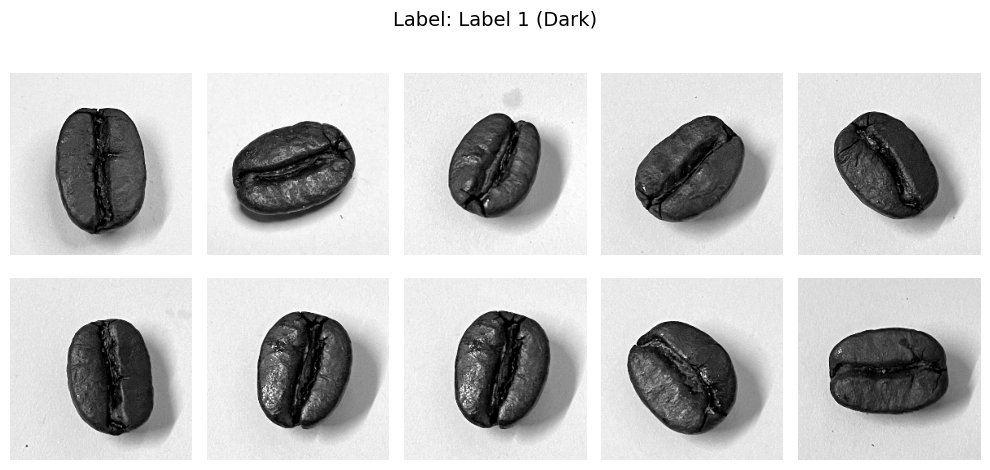

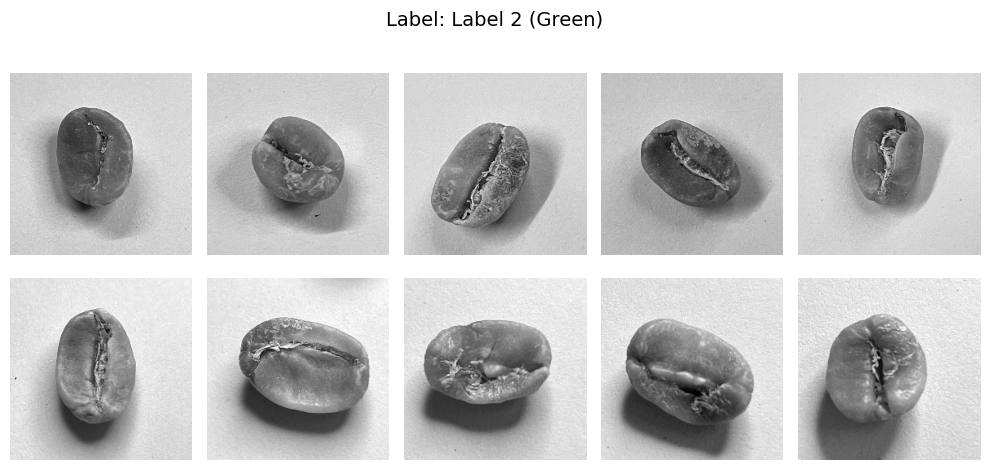

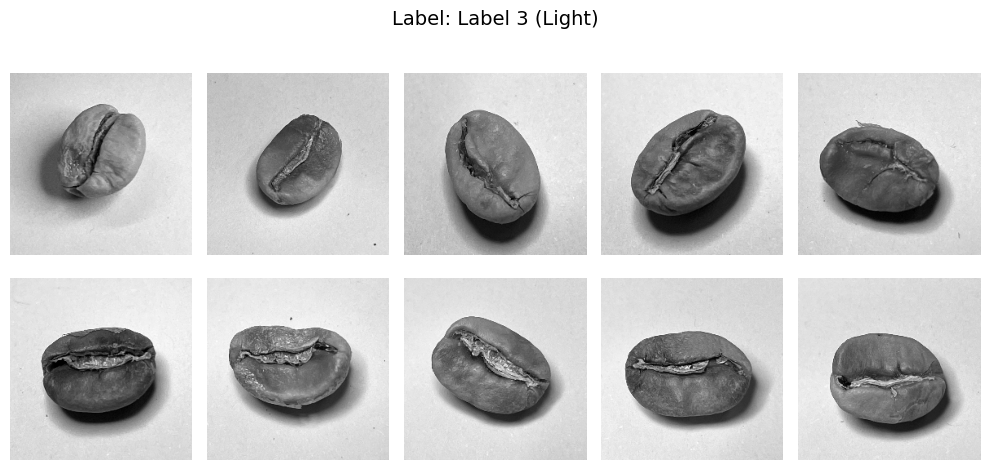

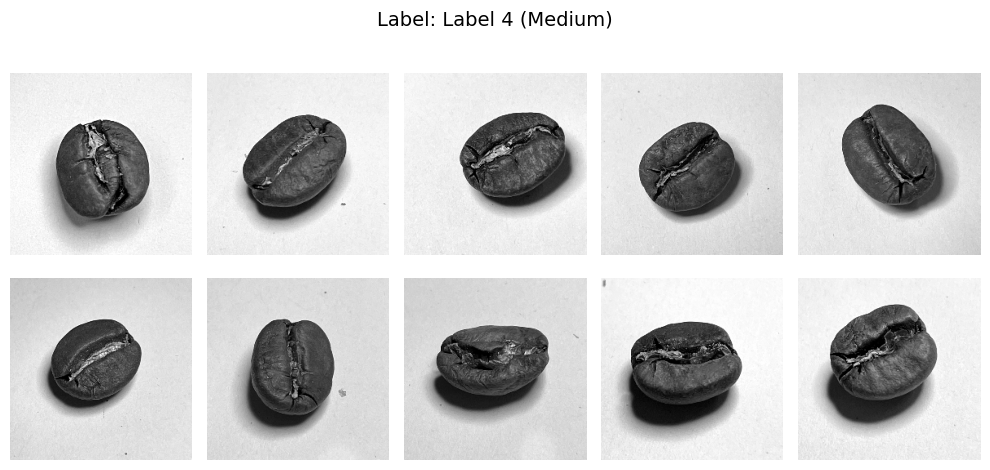

In [ ]:
# Mapping nama label ke nama tampilan
label_names = {
    "Dark": "Label 1",
    "Green": "Label 2",
    "Light": "Label 3",
    "Medium": "Label 4"
}

# Konversi semua gambar ke grayscale
gray_data = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in data]

# Tampilkan 10 gambar pertama dari setiap label
for label_code in label_names:
    idxs = np.where(np.array(labels) == label_code)[0][:10]

    if len(idxs) == 0:
        print(f"Tidak ada data untuk label '{label_code}'")
        continue

    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Label: {label_names[label_code]} ({label_code})", fontsize=14)

    for i, idx in enumerate(idxs):
        plt.subplot(2, 5, i + 1)
        plt.imshow(gray_data[idx], cmap='gray', vmin=0, vmax=255)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Kode di atas bertujuan untuk menampilkan 10 gambar pertama dari setiap label dalam bentuk grayscale. Pertama, label seperti "Dark" atau "Light" dipetakan ke nama tampilan yang lebih umum, seperti "Label 1", melalui dictionary `label_names`. Lalu, seluruh gambar asli dikonversi ke format grayscale menggunakan `cv.cvtColor`, dan hasilnya disimpan di `gray_data`. Selanjutnya, untuk setiap label, kode mencari indeks gambar yang sesuai dan mengambil maksimal 10 gambar pertama. Gambar-gambar ini kemudian divisualisasikan dalam layout 2 baris dan 5 kolom menggunakan Matplotlib, lengkap dengan judul yang menunjukkan nama label aslinya dan nama tampilannya.


Kode di bawah yaitu Fungsi `glcm` ini digunakan untuk menghitung matriks *Gray Level Co-occurrence Matrix* (GLCM) dari sebuah citra grayscale, yang merupakan metode untuk mengekstraksi tekstur citra. Pertama, gambar diubah ke skala 0–255 dan dikonversi ke tipe `uint8` agar kompatibel dengan fungsi GLCM. Parameter `derajat` menentukan arah hubungan piksel yang ingin dianalisis—misalnya 0, 45, 90, atau 135 derajat—dan dikonversi ke bentuk radian. Fungsi `graycomatrix` dari `skimage.feature` kemudian dipanggil untuk menghasilkan matriks GLCM berdasarkan arah dan jarak piksel tertentu. Matriks ini dihitung dengan properti simetris dan ternormalisasi, dan hasilnya dikembalikan sebagai output fungsi.

In [17]:
def glcm(image, derajat):
    image = (image * 255).astype(np.uint8)  
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Kode di bawah yaitu Fungsi `correlation` menghitung korelasi dari matriks GLCM, yang menunjukkan seberapa kuat hubungan antara piksel berpasangan dalam citra.


In [18]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

Kode di bawah yaitu Fungsi `dissimilarity` mengukur perbedaan intensitas antar piksel bertetangga dalam citra dari matriks GLCM, lalu mengambil nilainya dari indeks `[0, 0]`.

In [19]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Kode di bawah yaitu Fungsi `homogenity` mengambil nilai homogenitas dari GLCM, yang menunjukkan seberapa seragam tekstur citra, dan mengembalikannya dari indeks `[0, 0]`.

In [20]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Kode di bawah yaitu Fungsi `contrast` menghitung nilai kontras dari matriks GLCM, yang mencerminkan perbedaan intensitas antar piksel, dan mengembalikannya dari indeks `[0, 0]`.

In [21]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Kode di bawah yaitu Fungsi `ASM` menghitung Angular Second Moment (ASM) dari matriks GLCM, yang menunjukkan tingkat kehomogenan tekstur, dan mengembalikannya dari indeks `[0, 0]`.

In [22]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

Kode di bawah yaitu Fungsi `energy` menghitung nilai energi dari matriks GLCM, yang mencerminkan keseragaman tekstur, dan mengembalikannya dari indeks `[0, 0]`.

In [23]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

Kode di atas yaitu Fungsi `entropyGlcm` menghitung entropi dari matriks GLCM yang telah diratakan (`ravel()`), untuk mengukur kompleksitas atau ketidakteraturan tekstur dalam citra.

In [24]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Potongan kode di bawah digunakan untuk menghitung matriks GLCM (Gray Level Co-occurrence Matrix) dari setiap citra grayscale pada 4 derajat arah berbeda: 0°, 45°, 90°, dan 135°.

Berikut penjelasan singkat namun lengkap:

gray_data adalah daftar gambar dalam format grayscale.

Untuk setiap gambar (i), fungsi glcm() dipanggil empat kali untuk menghitung GLCM pada masing-masing sudut.

Hasil GLCM untuk setiap sudut kemudian disimpan ke dalam list sesuai derajatnya (Derajat0, Derajat45, dll).

Tujuannya adalah menyiapkan data tekstur dari berbagai arah untuk digunakan dalam ekstraksi fitur seperti kontras, homogenitas, dan lainnya.

In [25]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(gray_data)):
    D0 = glcm(gray_data[i], 0)
    D45 = glcm(gray_data[i], 45)
    D90 = glcm(gray_data[i], 90)
    D135 = glcm(gray_data[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode di bawah membuat list kosong untuk menyimpan hasil ekstraksi fitur tekstur dari gambar grayscale menggunakan metode GLCM pada empat sudut berbeda (0°, 45°, 90°, 135°). Fitur yang disiapkan mencakup kontras, dissimilarity, homogenity, entropy, ASM, energy, dan correlation—semuanya menggambarkan karakteristik pola atau tekstur dari gambar. Nantinya, setiap fitur ini akan diisi dengan nilai-nilai dari masing-masing gambar untuk setiap sudut, sebagai bagian dari proses ekstraksi ciri sebelum klasifikasi.

In [26]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

Kode di bawah mengekstraksi fitur **correlation** dari matriks GLCM yang telah dihitung sebelumnya untuk setiap sudut (0°, 45°, 90°, dan 135°) dari seluruh gambar grayscale. Untuk setiap gambar, kode ini mengambil matriks GLCM dari masing-masing sudut, menghitung nilai correlation-nya menggunakan fungsi `correlation()`, lalu menyimpannya ke dalam list yang sesuai (`correlation0`, `correlation45`, dst.). Ini bertujuan untuk mengukur sejauh mana satu piksel berkorelasi dengan tetangganya, yang berguna dalam klasifikasi berdasarkan tekstur.

In [27]:
for i in range(len(gray_data)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

Kode di bawah digunakan untuk menghitung fitur **contrast** dari matriks GLCM (Gray Level Co-occurrence Matrix) untuk setiap gambar pada empat arah sudut (0°, 45°, 90°, dan 135°). Pada setiap iterasi, kode mengambil matriks GLCM hasil dari `Derajat0[i]`, `Derajat45[i]`, dan seterusnya, kemudian menghitung nilai contrast-nya menggunakan fungsi `contrast()`. Nilai-nilai tersebut kemudian disimpan ke dalam list `Kontras0`, `Kontras45`, `Kontras90`, dan `Kontras135`. Fitur contrast ini mencerminkan perbedaan intensitas antar piksel yang berdekatan dan berguna dalam analisis tekstur untuk klasifikasi gambar.

In [28]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

Kode di bawah menghitung fitur **dissimilarity** dari matriks GLCM untuk setiap gambar pada empat sudut arah (0°, 45°, 90°, dan 135°). Dalam setiap iterasi, matriks GLCM dari masing-masing arah diproses menggunakan fungsi `dissimilarity()`, lalu hasilnya disimpan ke dalam list `dissimilarity0`, `dissimilarity45`, `dissimilarity90`, dan `dissimilarity135`. Fitur dissimilarity ini mengukur sejauh mana perbedaan tingkat keabuan antar piksel, di mana nilai yang lebih tinggi menunjukkan kontras tekstur yang lebih tajam. Fitur ini penting untuk membedakan karakteristik permukaan dari gambar biji kopi berdasarkan arah teksturnya.

In [29]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Kode di bawah digunakan untuk menghitung fitur **homogenitas** dari matriks GLCM setiap gambar pada empat arah sudut (0°, 45°, 90°, dan 135°). Di tiap iterasi, fungsi `homogenity()` dipanggil untuk setiap derajat arah GLCM dari gambar ke-i, lalu hasilnya disimpan ke dalam list `homogenity0`, `homogenity45`, `homogenity90`, dan `homogenity135`. Fitur homogenitas ini mengukur seberapa seragam nilai intensitas piksel dalam tekstur; nilai yang lebih tinggi menunjukkan bahwa piksel-piksel memiliki nilai yang mirip dan tekstur cenderung halus atau tidak beragam.

In [30]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Kode di bawah digunakan untuk menghitung nilai **entropi** dari matriks GLCM untuk setiap gambar dalam empat arah sudut (0°, 45°, 90°, dan 135°). Dalam setiap iterasi, fungsi `entropyGlcm()` diterapkan pada GLCM hasil ekstraksi gambar ke-i untuk masing-masing sudut, lalu hasilnya dimasukkan ke dalam list `entropy0`, `entropy45`, `entropy90`, dan `entropy135`. Entropi ini mengukur kompleksitas atau ketidakteraturan tekstur; semakin tinggi nilai entropinya, semakin kompleks pola teksturnya.

In [ ]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

Kode di bawah menghitung nilai **ASM (Angular Second Moment)** dari matriks GLCM untuk setiap gambar dalam empat arah sudut (0°, 45°, 90°, dan 135°). ASM mencerminkan tingkat keseragaman atau homogenitas dalam tekstur gambar—nilai yang tinggi menunjukkan tekstur yang lebih seragam. Dalam setiap iterasi, nilai ASM dari masing-masing sudut dihitung menggunakan fungsi `ASM()` dan disimpan ke dalam list `ASM0`, `ASM45`, `ASM90`, dan `ASM135`.

In [32]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Kode di bawah menghitung **nilai energi (energy)** dari matriks GLCM untuk setiap gambar dalam empat arah sudut (0°, 45°, 90°, dan 135°). Energi mengukur kekompakan distribusi nilai tekstur, di mana nilai yang tinggi menunjukkan pola tekstur yang teratur atau berulang. Setiap nilai energi yang dihitung dari arah tertentu disimpan ke dalam list `energy0`, `energy45`, `energy90`, dan `energy135`, sesuai arah derajatnya.

In [33]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

Kode di bawah bertujuan untuk **menggabungkan seluruh fitur tekstur** dari setiap citra ke dalam satu vektor fitur per gambar, agar siap digunakan dalam model machine learning. Untuk tiap gambar, fitur yang digabung mencakup nilai dari tujuh jenis properti GLCM (seperti *correlation*, *contrast*, *entropy*, dll.) yang diukur dari empat arah berbeda (0°, 45°, 90°, 135°), sehingga menghasilkan total **28 fitur per gambar**. Semua vektor fitur kemudian dikumpulkan dalam list `features`, yang selanjutnya dikonversi menjadi array NumPy agar kompatibel dengan algoritma pembelajaran mesin. Label gambar juga diubah menjadi array `labels` untuk keperluan pelabelan saat training model.

In [ ]:
# Gabungkan semua fitur dari setiap citra ke dalam satu array fitur per gambar
features = []

for i in range(len(gray_data)):
    fitur = [
        correlation0[i], correlation45[i], correlation90[i], correlation135[i],
        dissimilarity0[i], dissimilarity45[i], dissimilarity90[i], dissimilarity135[i],
        Kontras0[i], Kontras45[i], Kontras90[i], Kontras135[i],
        homogenity0[i], homogenity45[i], homogenity90[i], homogenity135[i],
        entropy0[i], entropy45[i], entropy90[i], entropy135[i],
        ASM0[i], ASM45[i], ASM90[i], ASM135[i],
        energy0[i], energy45[i], energy90[i], energy135[i],
    ]
    features.append(fitur)

# Ubah menjadi numpy array agar bisa digunakan di ML model
features = np.array(features)
labels = np.array(labels)


In [34]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_3.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_3.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,dark (1).png,Dark,847.171144,956.541857,623.930313,991.250799,0.181424,0.168685,0.186456,0.172404,...,0.001068,0.000997,0.032101,0.031358,0.032679,0.031581,0.927507,0.918321,0.946629,0.915357
1,dark (10).png,Dark,561.748599,905.720324,783.802290,811.349977,0.223178,0.196121,0.212971,0.200880,...,0.003223,0.003069,0.056536,0.055318,0.056770,0.055401,0.958969,0.934027,0.942761,0.940901
2,dark (100).png,Dark,441.161115,588.812826,357.290098,477.828330,0.165539,0.150008,0.177360,0.157735,...,0.000984,0.000894,0.030394,0.029591,0.031367,0.029900,0.960095,0.946881,0.967692,0.956893
3,dark (101).png,Dark,657.000100,805.638400,619.704476,626.677914,0.165715,0.153198,0.172448,0.157544,...,0.001225,0.001164,0.034341,0.033789,0.035003,0.034123,0.941413,0.928332,0.944751,0.944252
4,dark (102).png,Dark,666.835502,732.853969,640.871757,903.228257,0.150751,0.144740,0.164621,0.143858,...,0.001187,0.001072,0.033267,0.032802,0.034453,0.032734,0.942788,0.937297,0.945033,0.922719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,medium (158).png,Medium,477.215547,619.291962,445.189782,603.966418,0.226465,0.207263,0.231912,0.207365,...,0.001061,0.000954,0.032256,0.031111,0.032572,0.030894,0.967678,0.958153,0.969850,0.959188
276,medium (159).png,Medium,450.518378,635.447626,497.971773,612.801283,0.238423,0.216609,0.235358,0.216056,...,0.001433,0.001313,0.037733,0.036298,0.037851,0.036237,0.958721,0.941942,0.954367,0.944011
277,medium (16).png,Medium,535.872538,742.582779,588.766316,653.118221,0.242505,0.221648,0.240927,0.226187,...,0.001411,0.001321,0.037447,0.036236,0.037565,0.036351,0.959374,0.943855,0.955367,0.950619
278,medium (160).png,Medium,439.511931,530.901647,432.334601,584.024372,0.213125,0.205073,0.217588,0.199211,...,0.002947,0.002801,0.053812,0.053361,0.054286,0.052920,0.963037,0.955464,0.963640,0.951007


Kode di bawah digunakan untuk **membuat dan menyimpan tabel fitur hasil ekstraksi** dari gambar ke dalam file CSV. Pertama, semua data fitur seperti *contrast*, *homogeneity*, *entropy*, dan lainnya dari keempat arah (0°, 45°, 90°, dan 135°) dimasukkan ke dalam dictionary `dataTable`, bersama dengan nama file (`Filename`) dan label kelas (`Label`). Lalu, dictionary ini dikonversi menjadi **DataFrame pandas** agar mudah diolah dan dibaca. Setelah itu, DataFrame disimpan ke dalam file CSV bernama `hasil_ekstraksi_3.csv` tanpa menambahkan indeks (`index=False`). Terakhir, file CSV yang sudah disimpan dibaca ulang dengan `pd.read_csv()` dan ditampilkan untuk memastikan isi file sesuai dengan data yang sudah diekstrak. Ini berguna untuk dokumentasi hasil ekstraksi fitur dan persiapan data sebelum modeling.

<Axes: >

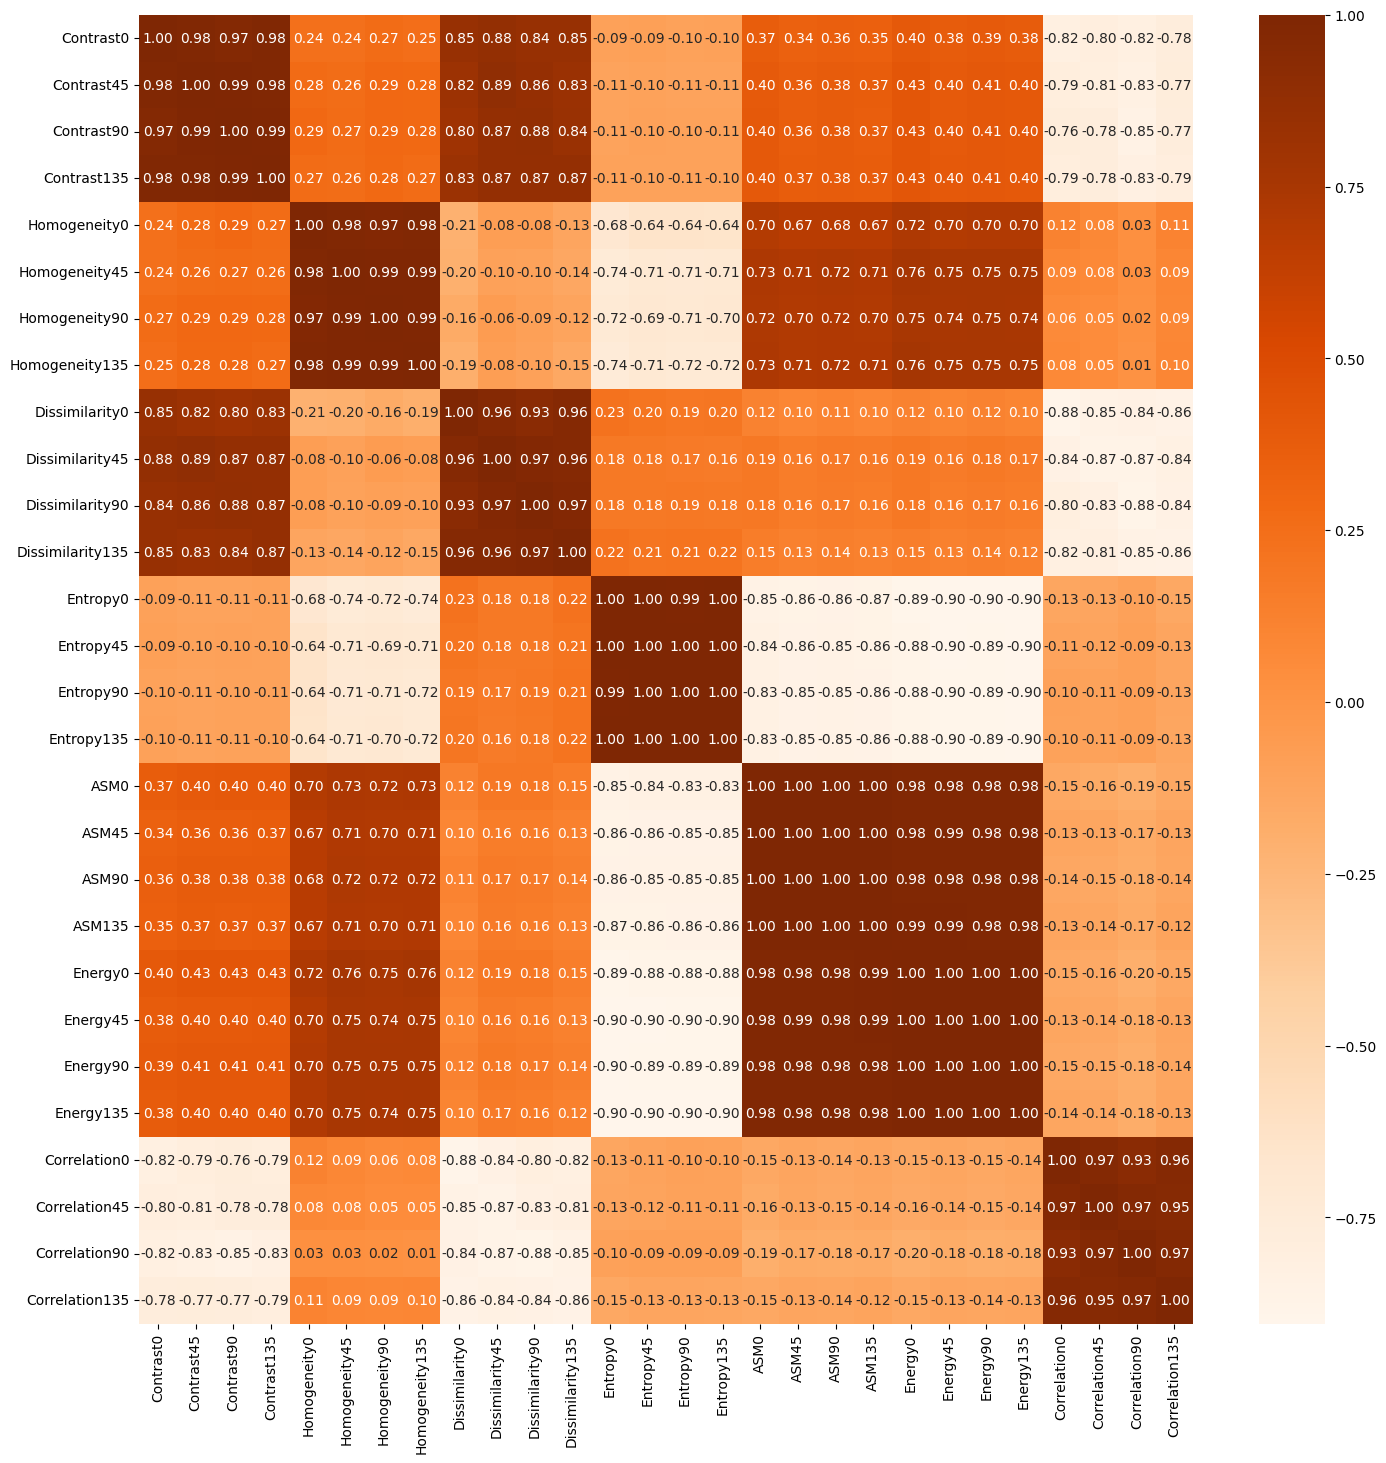

In [35]:
X = hasilEkstrak.drop(columns=['Label', 'Filename'])
y = hasilEkstrak['Label']

# Hitung nilai ANOVA F-score untuk setiap fitur
anova_selector = SelectKBest(score_func=f_classif, k='all')  # 'all' agar kita dapat semua skor
anova_selector.fit(X, y)

# Ambil skor dan nama fitur
anova_scores = anova_selector.scores_
feature_names = X.columns

# Threshold manual (contoh: hanya ambil fitur dengan skor > 5)
threshold = 5
selected_features = feature_names[anova_scores > threshold]

# Tampilkan fitur yang lolos seleksi
x_new = X[selected_features]
x_new

plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Oranges', fmt=".2f")


Kode di atas menggunakan ANOVA F-test (`SelectKBest`) untuk menghitung skor relevansi setiap fitur terhadap label. Fitur yang memiliki skor di atas 5 dianggap penting dan disimpan dalam `x_new`. Terakhir, korelasi antar fitur terpilih divisualisasikan dengan heatmap menggunakan Seaborn agar mempermudah analisis keterkaitan antar fitur.

Kode di bawah membagi data menjadi dua bagian: **data latih (training set)** dan **data uji (testing set)** dengan perbandingan 80:20 menggunakan fungsi `train_test_split`. Parameter `stratify=y` memastikan proporsi label tetap seimbang di kedua subset. `random_state=42` digunakan agar pembagian data bersifat tetap (reproducible). Terakhir, kode mencetak jumlah data latih dan data uji yang dihasilkan.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    x_new, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


print("Data Latih:", X_train.shape)
print("Data Uji:", X_test.shape)

Data Latih: (224, 28)
Data Uji: (56, 28)


Kode di bawah menormalisasi fitur menggunakan z-score, yaitu dengan mengurangi mean dan membagi dengan standar deviasi dari data latih. Proses ini dilakukan untuk menyamakan skala fitur, agar model dapat belajar lebih efektif tanpa dipengaruhi perbedaan skala antar fitur.


In [37]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

Kode di bawah melakukan normalisasi data menggunakan `MinMaxScaler`, yang mengubah nilai fitur agar berada dalam rentang 0 hingga 1. Metode ini memastikan semua fitur memiliki skala yang seragam, membantu meningkatkan kinerja algoritma machine learning, terutama yang sensitif terhadap skala seperti KNN dan SVM. Skaler dilatih (`fit`) pada data latih dan diterapkan (`transform`) pada data latih dan uji agar konsisten.


In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kode di bawah berisi fungsi `generateClassificationReport` yang mencetak metrik evaluasi model klasifikasi, yaitu classification report, confusion matrix, dan akurasi, berdasarkan label sebenarnya (`y_true`) dan prediksi model (`y_pred`). Fungsi ini berguna untuk memahami performa model secara menyeluruh. Setelah itu, kode juga mendefinisikan tiga model klasifikasi yang akan digunakan: Random Forest (`rf`) dengan 5 estimator, Support Vector Machine (`svm`) dengan kernel RBF, dan K-Nearest Neighbors (`knn`) dengan 5 tetangga—ketiganya siap untuk dilatih menggunakan data yang telah diproses sebelumnya.


In [39]:
def generateClassificationReport(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    print("Accuracy:", accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred_train = rf.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = rf.predict(X_test)
generateClassificationReport( y_test, y_pred_test)

------Training Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.98      1.00      0.99        56
       Green       0.98      0.98      0.98        56
       Light       0.98      0.96      0.97        56
      Medium       0.98      0.98      0.98        56

    accuracy                           0.98       224
   macro avg       0.98      0.98      0.98       224
weighted avg       0.98      0.98      0.98       224

Confusion Matrix:
[[56  0  0  0]
 [ 0 55  1  0]
 [ 0  1 54  1]
 [ 1  0  0 55]]
Accuracy: 0.9821428571428571

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.71      0.71      0.71        14
       Green       0.88      1.00      0.93        14
       Light       0.83      0.71      0.77        14
      Medium       0.71      0.71      0.71        14

    accuracy                           0.79        56
   macro avg       0.78      0.79  

Kode di atas melatih model Random Forest (`rf`) menggunakan data latih (`X_train` dan `y_train`). Setelah model dilatih, dilakukan evaluasi pada data latih dengan memprediksi label (`y_pred_train`) dan mencetak metrik evaluasi seperti classification report, confusion matrix, dan akurasi menggunakan fungsi `generateClassificationReport`. Langkah yang sama juga dilakukan untuk data uji: model digunakan untuk memprediksi label pada `X_test` dan hasil evaluasinya ditampilkan, sehingga dapat dibandingkan performa model pada data latih dan uji.


In [41]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred_train = svm.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = svm.predict(X_test)
generateClassificationReport( y_test, y_pred_test)


------Training Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.82      0.89      0.85        56
       Green       0.98      0.88      0.92        56
       Light       0.86      0.96      0.91        56
      Medium       0.86      0.77      0.81        56

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.87       224
weighted avg       0.88      0.88      0.87       224

Confusion Matrix:
[[50  0  0  6]
 [ 0 49  7  0]
 [ 0  1 54  1]
 [11  0  2 43]]
Accuracy: 0.875

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.80      0.86      0.83        14
       Green       0.85      0.79      0.81        14
       Light       0.71      0.86      0.77        14
      Medium       0.82      0.64      0.72        14

    accuracy                           0.79        56
   macro avg       0.79      0.79      0.78    

Kode di atas melatih model Support Vector Machine (`svm`) dengan data latih (`X_train`, `y_train`) dan kemudian mengevaluasinya. Pertama, model dilatih menggunakan `svm.fit`. Selanjutnya, prediksi dilakukan terhadap data latih (`y_pred_train`) dan hasil evaluasinya seperti classification report, confusion matrix, dan akurasi ditampilkan menggunakan `generateClassificationReport`. Proses yang sama juga diterapkan pada data uji (`X_test`) untuk menilai seberapa baik model bekerja pada data yang belum pernah dilihat.


In [42]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred_train = knn.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = knn.predict(X_test)
generateClassificationReport( y_test, y_pred_test)



------Training Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.86      0.88      0.87        56
       Green       0.98      0.89      0.93        56
       Light       0.83      0.96      0.89        56
      Medium       0.86      0.79      0.82        56

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.88       224
weighted avg       0.88      0.88      0.88       224

Confusion Matrix:
[[49  0  1  6]
 [ 0 50  6  0]
 [ 0  1 54  1]
 [ 8  0  4 44]]
Accuracy: 0.8794642857142857

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

        Dark       0.85      0.79      0.81        14
       Green       0.83      0.71      0.77        14
       Light       0.71      0.86      0.77        14
      Medium       0.71      0.71      0.71        14

    accuracy                           0.77        56
   macro avg       0.77      0.77 

Kode di atas melatih model K-Nearest Neighbors (`knn`) menggunakan data latih (`X_train`, `y_train`), lalu mengevaluasi performanya. Pertama, model dilatih dengan `knn.fit`, kemudian digunakan untuk memprediksi label pada data latih (`y_pred_train`) dan data uji (`y_pred_test`). Hasil evaluasi seperti classification report, confusion matrix, dan akurasi untuk kedua dataset ditampilkan menggunakan fungsi `generateClassificationReport` guna menilai kemampuan klasifikasi model pada data yang telah dilatih maupun data baru.


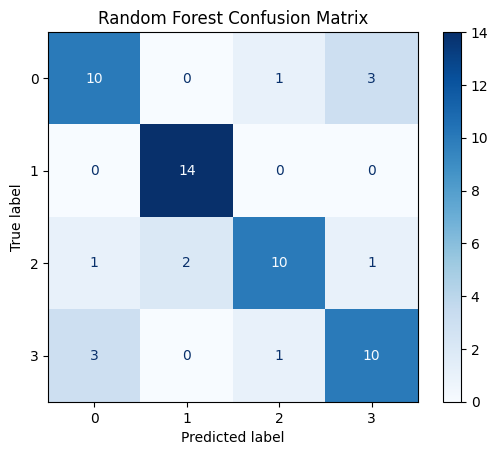

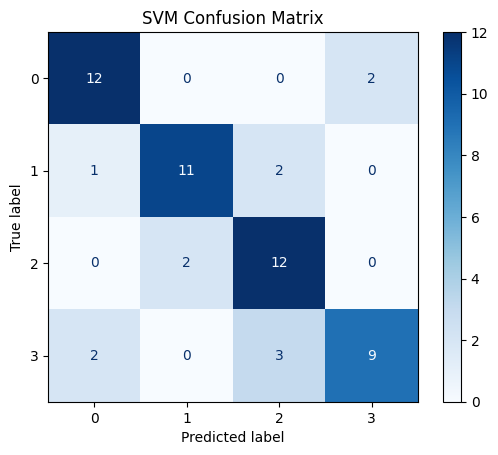

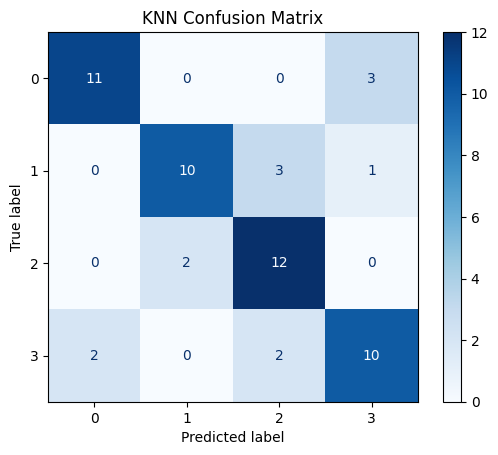

In [43]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")

Kode di atas digunakan untuk menampilkan confusion matrix dari hasil prediksi tiga model klasifikasi: Random Forest, SVM, dan KNN. Visualisasi ini membantu mengevaluasi performa masing-masing model. Berdasarkan confusion matrix yang ditampilkan, hasil klasifikasi dari ketiga model sudah cukup bagus karena sebagian besar prediksi berada pada posisi yang benar (diagonal), yang berarti model mampu mengenali label dengan akurasi yang baik.
